In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Advertising.csv')

## Understanding the Data

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)  # Changes are made in original dataframe since 'inplace is True'

In [45]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Extacting X and y

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Train and test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

## Training the Algorithm

In [31]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
a = pd.DataFrame(regressor.coef_, index = X.columns, columns = ['Coefficient'])
a

,Coefficient
TV,0.046952
radio,0.176586
newspaper,0.001851


##### If one more ad is advertised through radio it will help to increase sales by 0.18%, whereas newspaper will increase only 0.002% sales. Radio helps the most in generating sales followed by TV and then newspaper.

In [33]:
print(regressor.intercept_)

2.9372157346906125


## Making Predictions

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
58,23.8,21.663183
40,16.6,16.441379
34,9.5,7.691446
102,14.8,17.916317
184,17.6,18.670471
198,25.5,23.791993
95,16.9,16.282543
4,12.9,13.441387
29,10.5,9.152940
168,17.1,17.324753


## Evaluating the Algorithm

In [36]:
from sklearn import metrics

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.054832840507332
Mean Squared Error: 1.9289249074665737
Root Mean Squared Error: 1.3888574107756972


##### Root mean squared error is 1.38 which is near about 10% of the mean value of sales i.e 14.02. This means that our algorithm did a decent job.

In [38]:
regressor.score(X_train, y_train)

0.8850053786777521

###### 88.50% accuracy

## Plot our results

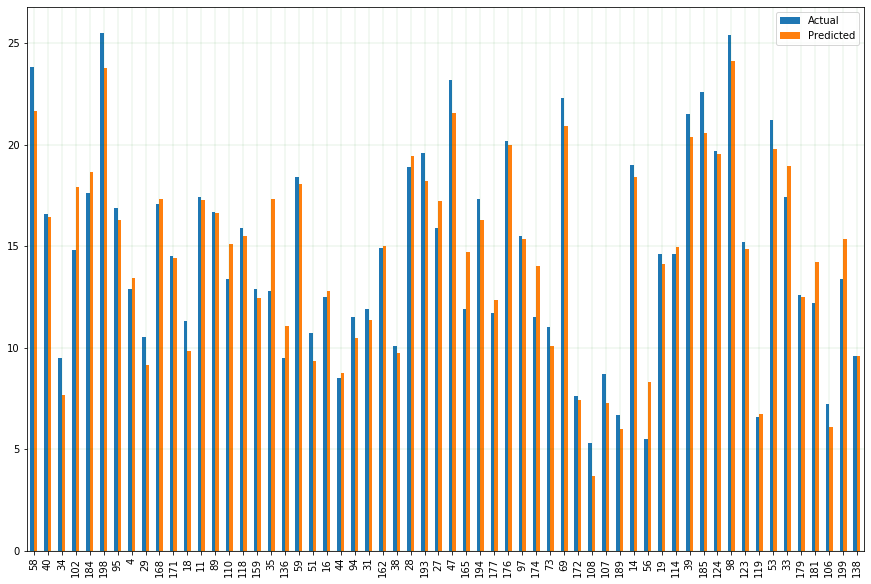

In [39]:
df.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='red')
plt.show()

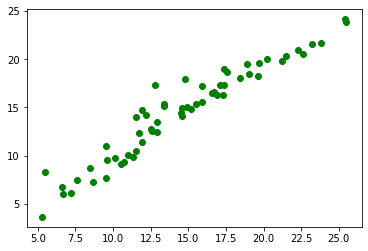

In [40]:
plt.scatter(y_test, y_pred, c = 'green')
plt.show()